In [2]:
import pandas as pd

df =  pd.read_csv("loan_approved.csv")
print(df.info)
df.describe()

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Gender - Nominal\
String data - No order - classification

Married - Nominal
String data - No order - classification

Dependents - ordinal

Education - Nominal
String data - No order - classification

Self_Employed - Nominal
String data - No order - classification

ApplicantIncome - Continous

CoapplicantIncome - Continous

LoanAmount - Continous

Loan_Amount_Term - Discrete

Credit_History- Discrete

Property_Area - Nominal 
String data - No order - classification

Loan_Status - Nominal
String data - No order - classification

In [3]:
me = df['ApplicantIncome'].mean()
st = df['ApplicantIncome'].std()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
z1 = (5849 - me)/st
z2 = (4583 - me)/st
z3 = (3000 - me)/st
z4 = (2583 - me)/st
z5 = (6000 - me)/st

print(z1)
print(z2)
print(z3)
print(z4)
print(z5)

## z score > 3 or < -3 are outliers





0.07293135984867927
-0.13430245319192863
-0.3934265653904138
-0.4616860440933629
0.09764882096173755


In [5]:
df["Property_Area"].shape


(614,)

In [6]:
pd.get_dummies(df["Property_Area"],dtype=int , prefix = "pa" )

,pa_Rural,pa_Semiurban,pa_Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [7]:
dd = pd.get_dummies(df["Property_Area"],dtype=int , prefix = "pa" , drop_first=True)
## By dropping first , we can indirectly identify first column , by the other two

In [8]:
df=  pd.concat([df,dd] , axis=1).drop(["Property_Area"],axis=1)


In [9]:
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [10]:
df.isnull().sum()


Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Loan_Status (Approved)     0
pa_Semiurban               0
pa_Urban                   0
dtype: int64

In [11]:
import numpy as np
df['Gender'].isnull().sum()
df.fillna(df['Gender'].mode())


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),pa_Semiurban,pa_Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y,0,0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Y,0,0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Y,0,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Y,0,1


In [12]:

df1 = pd.get_dummies(df['Gender'], prefix='G', drop_first=True)
df = pd.concat([df, df1], axis=1).drop(['Gender'], axis=1)


In [13]:
df

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),pa_Semiurban,pa_Urban,G_Male
0,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y,0,1,True
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,0,0,True
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,0,1,True
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,0,1,True
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y,0,0,False
610,LP002979,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Y,0,0,True
611,LP002983,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Y,0,1,True
612,LP002984,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Y,0,1,True


In [14]:
df2 = pd.get_dummies(df['Education'], prefix='Education', drop_first=True)
df = pd.concat([df, df2], axis=1).drop(['Education'], axis=1)



In [15]:
df

,Loan_ID,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),pa_Semiurban,pa_Urban,G_Male,Education_Not Graduate
0,LP001002,No,0,No,5849,0.0,NaN,360.0,1.0,Y,0,1,True,False
1,LP001003,Yes,1,No,4583,1508.0,128.0,360.0,1.0,N,0,0,True,False
2,LP001005,Yes,0,Yes,3000,0.0,66.0,360.0,1.0,Y,0,1,True,False
3,LP001006,Yes,0,No,2583,2358.0,120.0,360.0,1.0,Y,0,1,True,True
4,LP001008,No,0,No,6000,0.0,141.0,360.0,1.0,Y,0,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,0,No,2900,0.0,71.0,360.0,1.0,Y,0,0,False,False
610,LP002979,Yes,3+,No,4106,0.0,40.0,180.0,1.0,Y,0,0,True,False
611,LP002983,Yes,1,No,8072,240.0,253.0,360.0,1.0,Y,0,1,True,False
612,LP002984,Yes,2,No,7583,0.0,187.0,360.0,1.0,Y,0,1,True,False


In [16]:
df['Dependents'].isnull().sum()
df.fillna(df['Dependents'].mode())
df3 = pd.get_dummies(df['Dependents'], prefix='Dependents', drop_first=True)
df = pd.concat([df, df3], axis=1).drop(['Dependents'], axis=1)



In [17]:
df

,Loan_ID,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),pa_Semiurban,pa_Urban,G_Male,Education_Not Graduate,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,No,No,5849,0.0,NaN,360.0,1.0,Y,0,1,True,False,False,False,False
1,LP001003,Yes,No,4583,1508.0,128.0,360.0,1.0,N,0,0,True,False,True,False,False
2,LP001005,Yes,Yes,3000,0.0,66.0,360.0,1.0,Y,0,1,True,False,False,False,False
3,LP001006,Yes,No,2583,2358.0,120.0,360.0,1.0,Y,0,1,True,True,False,False,False
4,LP001008,No,No,6000,0.0,141.0,360.0,1.0,Y,0,1,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,No,2900,0.0,71.0,360.0,1.0,Y,0,0,False,False,False,False,False
610,LP002979,Yes,No,4106,0.0,40.0,180.0,1.0,Y,0,0,True,False,False,False,True
611,LP002983,Yes,No,8072,240.0,253.0,360.0,1.0,Y,0,1,True,False,True,False,False
612,LP002984,Yes,No,7583,0.0,187.0,360.0,1.0,Y,0,1,True,False,False,True,False


In [18]:
df['LoanAmount'].kurtosis()

np.float64(10.40153349029416)

In [19]:
df['LoanAmount'].skew()

np.float64(2.677551679256059)

In [20]:
from sklearn.preprocessing import PowerTransformer
trans = PowerTransformer(method = 'box-cox')


In [21]:
la_trans = trans.fit_transform(df[['LoanAmount']])
la_trans.shape

(614, 1)

In [24]:
print("skewness : ", pd.Series(la_trans.reshape(614,)).skew())
print("kurtosis :", pd.Series(la_trans.reshape(614,)).kurtosis())


skewness :  0.025572275242368367
kurtosis : 2.3045298672798


<Axes: ylabel='Count'>

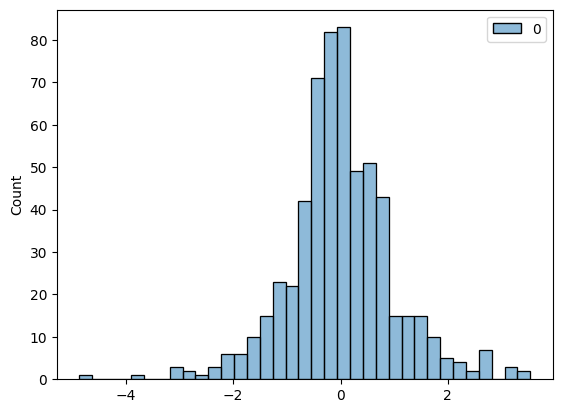

In [29]:
import seaborn as sns
sns.histplot(la_trans , color="green")